In [1]:
import pandas as pd

In [2]:
data_cov = 'D:\\basicdata\\2019_nCoV_data.csv'

In [3]:
coV = pd.read_csv(data_cov)

In [4]:
coV

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [5]:
coV.isnull().any()

Sno               False
Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [6]:
coV['Province/State'] = coV['Province/State'].fillna('unknown')

In [7]:
coV.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [8]:
coV.isnull().any()

Sno               False
Date              False
Province/State    False
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [9]:
df_cov = coV[['Country','Confirmed','Deaths','Recovered']]
df_cov

,Country,Confirmed,Deaths,Recovered
0,China,1.0,0.0,0.0
1,China,14.0,0.0,0.0
2,China,6.0,0.0,0.0
3,China,1.0,0.0,0.0
4,China,0.0,0.0,0.0
5,China,26.0,0.0,0.0
6,China,2.0,0.0,0.0
7,China,1.0,0.0,0.0
8,China,4.0,0.0,0.0
9,China,1.0,0.0,0.0


In [10]:
rest_Cov = df_cov[df_cov['Country'] != 'China'].reset_index()

In [11]:
df_cov1 = rest_Cov[['Country','Confirmed','Deaths','Recovered']]
df_cov1.head()

,Country,Confirmed,Deaths,Recovered
0,US,1.0,0.0,0.0
1,Japan,2.0,0.0,0.0
2,Thailand,2.0,0.0,0.0
3,South Korea,1.0,0.0,0.0
4,Mainland China,9.0,0.0,0.0


In [12]:
df_cov1['SUM'] = df_cov1.Confirmed + df_cov1.Deaths + df_cov1.Recovered
df_cov2 = df_cov1.groupby('Country')['SUM'].sum().reset_index()
df_cov2.head()

,Country,SUM
0,Australia,354.0
1,Belgium,15.0
2,Brazil,0.0
3,Cambodia,28.0
4,Canada,122.0


In [13]:
df_cov1['Confirmed'] = df_cov1.Confirmed
df_cov3 = df_cov1.groupby('Country')['Confirmed'].sum().reset_index()
df_cov3.head()

,Country,Confirmed
0,Australia,284.0
1,Belgium,14.0
2,Brazil,0.0
3,Cambodia,22.0
4,Canada,116.0


In [14]:
df_cov1['Deaths'] = df_cov1.Deaths
df_cov1['Recovered'] = df_cov1.Recovered
df_cov4 = df_cov1.groupby('Country')['Deaths'].sum().reset_index()
df_cov5 = df_cov1.groupby('Country')['Recovered'].sum().reset_index()

In [15]:
covid19 = df_cov3.merge(df_cov2,how='left',left_on='Country',right_on='Country')

In [16]:
covid19.head()

,Country,Confirmed,SUM
0,Australia,284.0,354.0
1,Belgium,14.0,15.0
2,Brazil,0.0,0.0
3,Cambodia,22.0,28.0
4,Canada,116.0,122.0


In [17]:
df1_covid19 = df_cov4.merge(covid19,how='left',left_on='Country',right_on='Country')
df2_covid19 = df_cov5.merge(df1_covid19,how='left',left_on='Country',right_on='Country')

In [18]:
df2_covid19.head()

,Country,Recovered,Deaths,Confirmed,SUM
0,Australia,70.0,0.0,284.0,354.0
1,Belgium,1.0,0.0,14.0,15.0
2,Brazil,0.0,0.0,0.0,0.0
3,Cambodia,6.0,0.0,22.0,28.0
4,Canada,6.0,0.0,116.0,122.0


In [19]:
df2_covid19

,Country,Recovered,Deaths,Confirmed,SUM
0,Australia,70.0,0.0,284.0,354.0
1,Belgium,1.0,0.0,14.0,15.0
2,Brazil,0.0,0.0,0.0,0.0
3,Cambodia,6.0,0.0,22.0,28.0
4,Canada,6.0,0.0,116.0,122.0
5,Egypt,0.0,0.0,4.0,4.0
6,Finland,7.0,0.0,20.0,27.0
7,France,18.0,3.0,186.0,207.0
8,Germany,5.0,0.0,252.0,257.0
9,Hong Kong,8.0,14.0,681.0,703.0


# Plot graph

In [20]:
from matplotlib import pyplot as plt

In [21]:
data_survi = df2_covid19.iloc[20:,:]

In [22]:
data_survi

,Country,Recovered,Deaths,Confirmed,SUM
20,Philippines,6.0,17.0,47.0,70.0
21,Russia,12.0,0.0,36.0,48.0
22,Singapore,122.0,0.0,797.0,919.0
23,South Korea,63.0,0.0,444.0,507.0
24,Spain,6.0,0.0,27.0,33.0
25,Sri Lanka,10.0,0.0,22.0,32.0
26,Sweden,0.0,0.0,18.0,18.0
27,Taiwan,16.0,2.0,320.0,338.0
28,Thailand,176.0,0.0,581.0,757.0
29,UK,20.0,0.0,93.0,113.0


In [23]:
# เลือกประเทศที่ต้องการมา 5 ประเทศ

In [24]:
data_survi1 = df2_covid19.iloc[28:,]

In [25]:
data_survi1

,Country,Recovered,Deaths,Confirmed,SUM
28,Thailand,176.0,0.0,581.0,757.0
29,UK,20.0,0.0,93.0,113.0
30,US,27.0,0.0,250.0,277.0
31,United Arab Emirates,15.0,0.0,126.0,141.0
32,Vietnam,57.0,0.0,225.0,282.0


# Barchart

Text(0, 0.5, 'people')

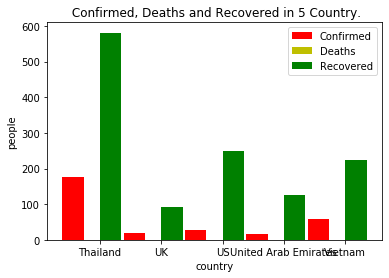

In [26]:
plt.bar([1-(0.35/2),2-(0.35/2),3-(0.35/2),4-(0.35/2),5-(0.35/2)],
        data_survi1.iloc[:,1],width=0.35,tick_label=data_survi1.iloc[:,0],color= 'r',label='Confirmed',align='edge')
plt.bar([1+(0.35/2),2+(0.35/2),3+(0.35/2),4+(0.35/2),5+(0.35/2)],
        data_survi1.iloc[:,2],width=0.35,tick_label=data_survi1.iloc[:,0],color= 'y',label='Deaths',align='edge')
plt.bar([1+(2.5*0.35/2),2+(2.5*0.35/2),3+(2.5*0.35/2),4+(2.5*0.35/2),5+(2.5*0.35/2)],
        data_survi1.iloc[:,3],width=0.35,tick_label=data_survi1.iloc[:,0],color= 'g',label='Recovered',align='edge')
plt.title(' Confirmed, Deaths and Recovered in 5 Country.')
plt.xlabel('country')
plt.legend(loc=1) 
plt.ylabel('people')

# Line Graph

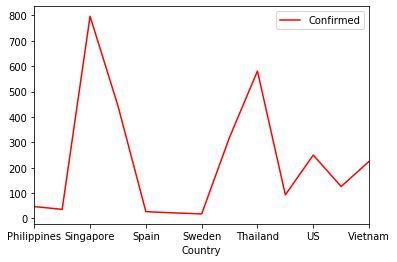

In [29]:
data_survi.plot(kind='line',x='Country' ,y='Confirmed', color= 'r',) 
plt.show()

# Treemap

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import squarify
confir_df = data_survi1['Confirmed']

In [49]:
labels = ['Thailand\n 581', 'UK\n 93',
          'US\n250', 'United Arab Emirates\n126',
          'Vietnam\n225']
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

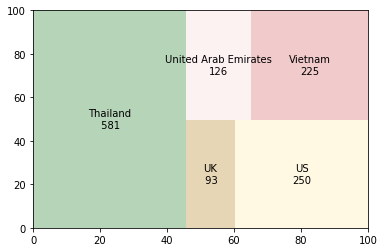

In [52]:
squarify.plot(sizes=confir_df, label = labels, color=color_list, alpha = 0.3)

# Stacked Barchart

In [53]:
coVdata = pd.DataFrame([{'Thailand':581, 'UK':93, 'US':250, 'United Arab Emirates':126,'Vietnam':225},
                                    {'Thailand':176, 'UK':20, 'US':27, 'United Arab Emirates':15,'Vietnam':57}])
coVdata

,Thailand,UK,US,United Arab Emirates,Vietnam
0,581,93,250,126,225
1,176,20,27,15,57


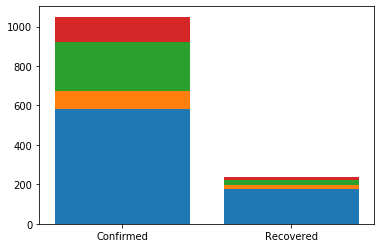

In [54]:
plt.bar([1, 2], coVdata.iloc[:,0], tick_label =['Confirmed','Recovered'])
plt.bar([1, 2], coVdata.iloc[:,1], bottom = coVdata.iloc[:,0], tick_label = ['Confirmed','Recovered'])
plt.bar([1, 2], coVdata.iloc[:,2], bottom = coVdata.iloc[:,0]+coVdata.iloc[:,1], tick_label = ['Confirmed','Recovered'])
plt.bar([1, 2], coVdata.iloc[:,3], bottom = coVdata.iloc[:,0]+coVdata.iloc[:,1]+coVdata.iloc[:,2], tick_label = ['Confirmed','Recovered']);

In [57]:
labels = data_survi1.Country
size = data_survi1.Recovered
colors = ['gray','red','green','yellow','blue']
lode = (0.1,0.1,0.1,0.1,0.1)

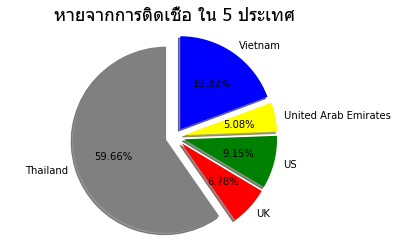

In [126]:
plt.pie(size,explode=lode,labels=labels,colors=colors,autopct = '%2.2f%%',shadow =True , startangle = 90)
plt.axis('equal')
plt.title('หายจากการติดเชื้อ ใน 5 ประเทศ',fontname='Tahoma',fontsize=18)
plt.show()

In [119]:
labels = data_survi1.Country
sizes = data_survi1.Confirmed

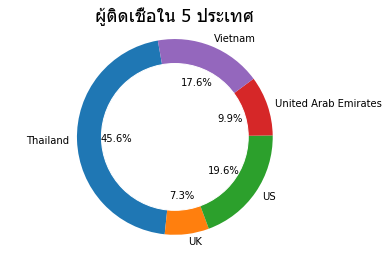

In [122]:
cc = plt.Circle((0, 0), 0.75, color='white')
d = plt.pie(sizes, labels=labels, autopct='%1.1f%%',
            startangle=100, labeldistance=1.08)
plt.axis('equal')
plt.gca().add_artist(cc)
plt.title('ผู้ติดเชื้อใน 5 ประเทศ',fontname='Tahoma',fontsize=18)
plt.show()